In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preproceesing
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Iris Flower Dataset
https://www.kaggle.com/datasets/arshid/iris-flower-dataset

**Mitko Stoychev**

10/06/2024

## 1. Introduction

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

**Features**:

The dataset contains a set of 150 records under 5 attributes:
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm
5. Species

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png">

## 2. Data Exploration

### 2.1. Load the data

In [2]:
data = pd.read_csv("data/iris.data.csv", header=None)
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data.columns = cols
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 2.2. Check for null values

In [3]:
print(data.isna().sum())

data.info()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


At first glance I can see that the dataset is very small (150 entries) and there are not any null values, nor min value equal to zero in the dataset.

### 2.3. Check for duplicates

In [5]:
data[data.duplicated() == True]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Data is free from duplicates values. Measuring 50 flowers and repeating 1 exact measurement with such small standard deviations is likely to happen.

Conclusion: I don't have to tidy the data, nor clean it. The dataset is tidy and clean.

### 2.4. Categorical Data

In [6]:
categorical_col = data.select_dtypes(include=['object'])
print(f"The dataset has {categorical_col.shape[1]} categorical columns.")

categorical_col.head()

The dataset has 1 categorical columns.


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
*********************************************************************


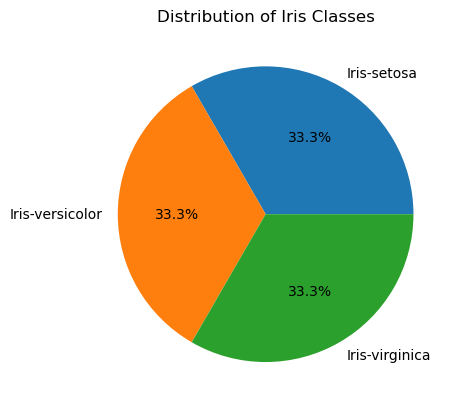

In [7]:
print(categorical_col.value_counts())
print("*********************************************************************")

class_counts = data['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Iris Classes')
plt.show()

### 2.5. Numerical Data

In [8]:
numerical_col = data.select_dtypes(include=["int", "float"])
print(f"The dataset has {numerical_col.shape[1]} numerical columns.")

numerical_col.head()

The dataset has 4 numerical columns.


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


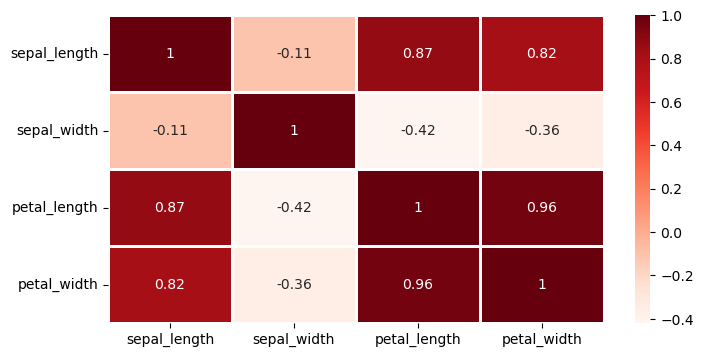

In [9]:
# decribe method
print(numerical_col.describe())

# Heatmap to check any correlations
plt.figure(figsize=(8,4))
sns.heatmap(numerical_col.corr(), annot=True, linewidth=1, cmap="Reds")
plt.show()

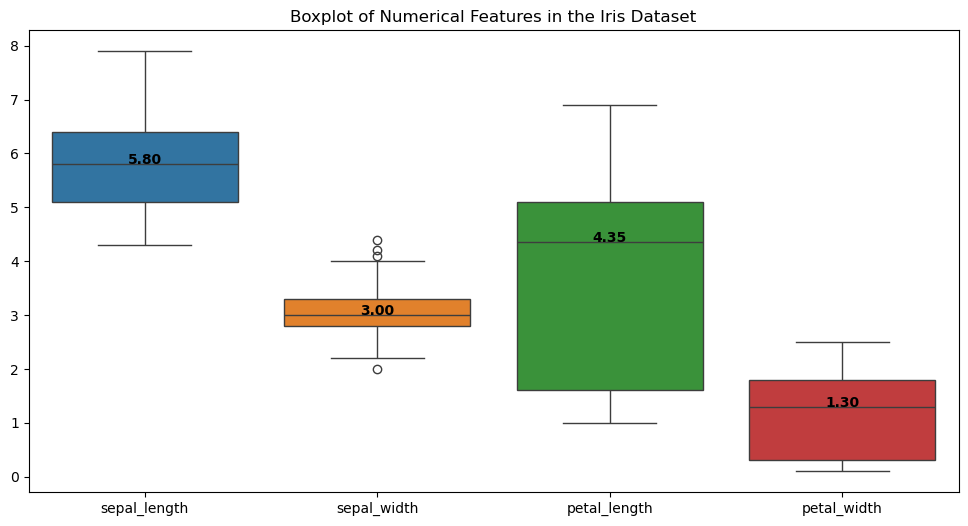

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_col)
plt.title('Boxplot of Numerical Features in the Iris Dataset')

medians = numerical_col.median()
for idx, median in enumerate(medians):
    plt.text(idx, median, f'{median:.2f}', 
             horizontalalignment='center', 
             size='medium', 
             color='black', 
             weight='semibold')
plt.show()

The data at first glance appear to have a linear relationship, we can observe several correlations.

We can note that "Sepal Width" has some outliers.

### 2.6. Bivariate Analysis

Bivariate analysis is a statistical method used to explore the relationship between two variables simultaneously. 

It focuses on understanding how changes in one variable are associated with changes in another variable. 

#### Sepal Length

In [11]:
# GROUPING BY "class/species"
data.groupby(["class"])["sepal_length"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,5.006,5.0,0.352490,50
Iris-versicolor,5.936,5.9,0.516171,50
Iris-virginica,6.588,6.5,0.635880,50


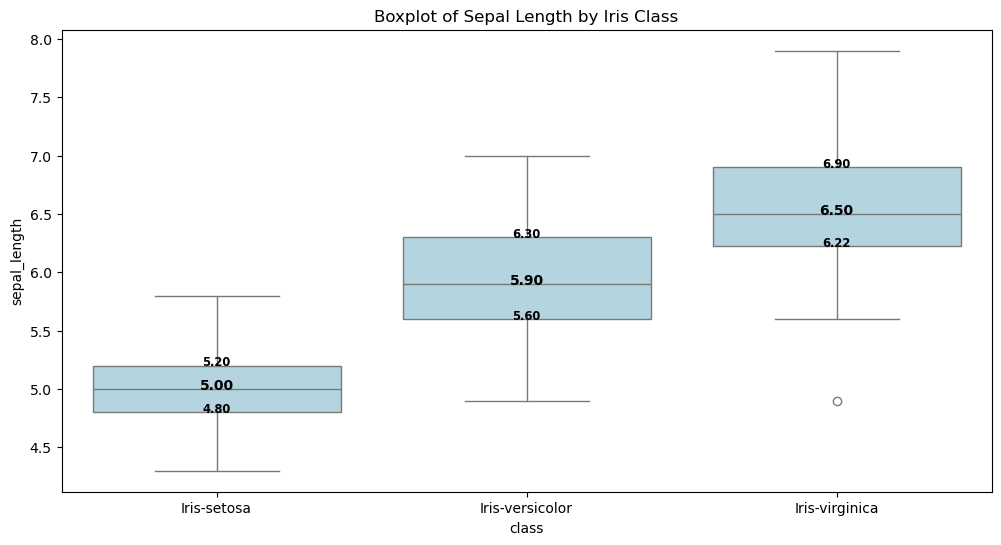

In [12]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="class", y="sepal_length", color="lightblue")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["sepal_length"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Sepal Length by Iris Class")
plt.show()

From the above visualization, Iris-virginica has the highest average sepal length (mean: 6.588), compared to Iris-versicolor (mean: 5.936) and Iris-setosa (mean: 5.006).

The standard deviation is highest for Iris-virginica (0.635880), which indicates more variability in sepal length for this species. This could be related to the larger size of the plants, leading to more variation. It seems to be a totally natural behavior


#### Sepal Width

In [13]:
# GROUPING BY "class/species"
data.groupby(["class"])["sepal_width"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,3.418,3.4,0.381024,50
Iris-versicolor,2.770,2.8,0.313798,50
Iris-virginica,2.974,3.0,0.322497,50


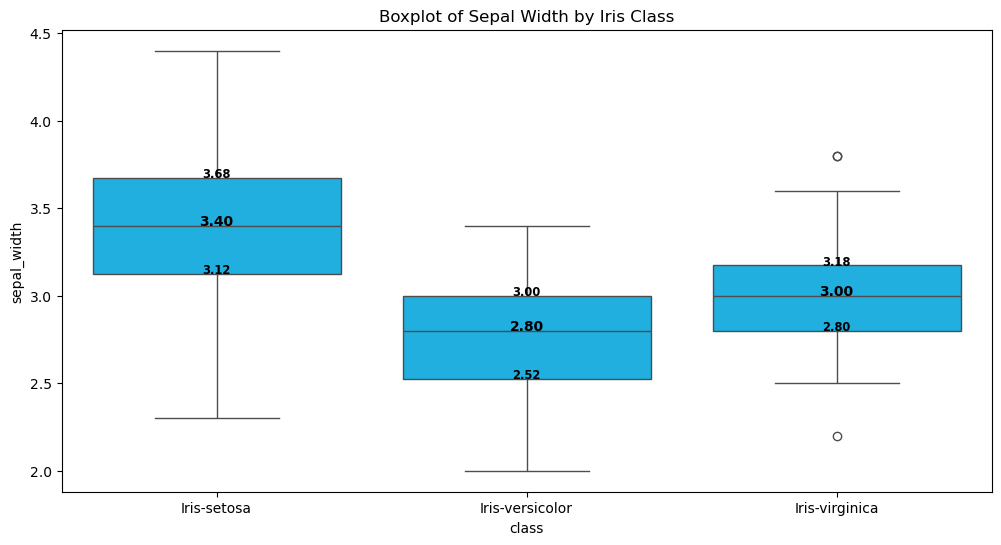

In [14]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="class", y="sepal_width", color="deepskyblue")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["sepal_width"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Sepal Width by Iris Class")
plt.show()

From the above visualization, Iris-setosa has the highest average sepal width (mean: 3.418) compared to Iris-virginica (mean: 2.974) and Iris-versicolor (mean: 2.770). The species with the highest sepal width (Iris-setosa) is the one with the lowest sepal length. This might suggest different evolutionary adaptations for iris plants.

We also note that there is no clear correlation between sepal length and sepal width based on the mean values across the species. This suggests that sepal length and width may vary independently of each other.

As a last note, Iris Virginica is the only species that presents outliers among the measurements of the sepals.

#### Petal Length

In [15]:
# GROUPING BY "class/species"
data.groupby(["class"])["petal_length"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,1.464,1.50,0.173511,50
Iris-versicolor,4.260,4.35,0.469911,50
Iris-virginica,5.552,5.55,0.551895,50


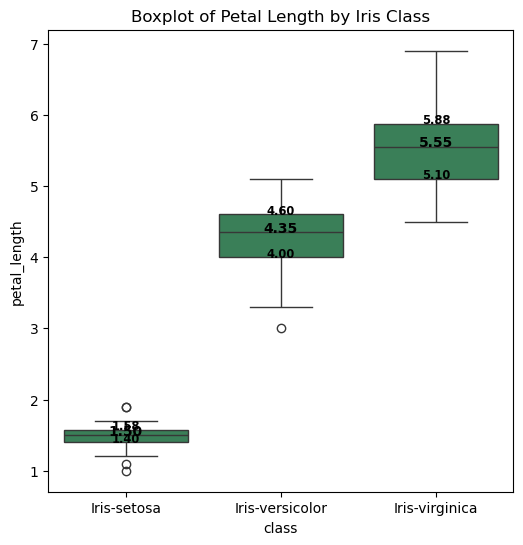

In [16]:
# Create the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, x="class", y="petal_length", color="seagreen")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["petal_length"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Petal Length by Iris Class")
plt.show()

Iris-virginica has the highest average petal length (mean: 5.552) compared to Iris-versicolor (mean: 4.260) and Iris-setosa (mean: 1.464).

The standard deviation is highest for Iris-virginica (0.551895), indicating more variability in petal length for this species, likely related to the larger size of the plants. Natural behaviour similar to sepal.

#### Petal Width

In [17]:
# GROUPING BY "class/species"
data.groupby(["class"])["petal_width"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,0.244,0.2,0.107210,50
Iris-versicolor,1.326,1.3,0.197753,50
Iris-virginica,2.026,2.0,0.274650,50


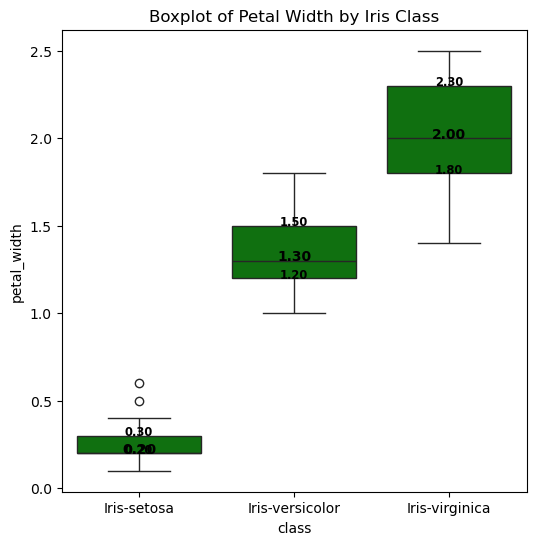

In [18]:
# Create the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, x="class", y="petal_width", color="green")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["petal_width"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Petal Width by Iris Class")
plt.show()

Iris-virginica has the highest average petal width (mean: 2.026) compared to Iris-versicolor (mean: 1.326) and Iris-setosa (mean: 0.244).

The species with the highest petal width (Iris-virginica) also has the highest petal length. This might suggest a correlation between larger petal dimensions.

### 2.7. Histogram distributions

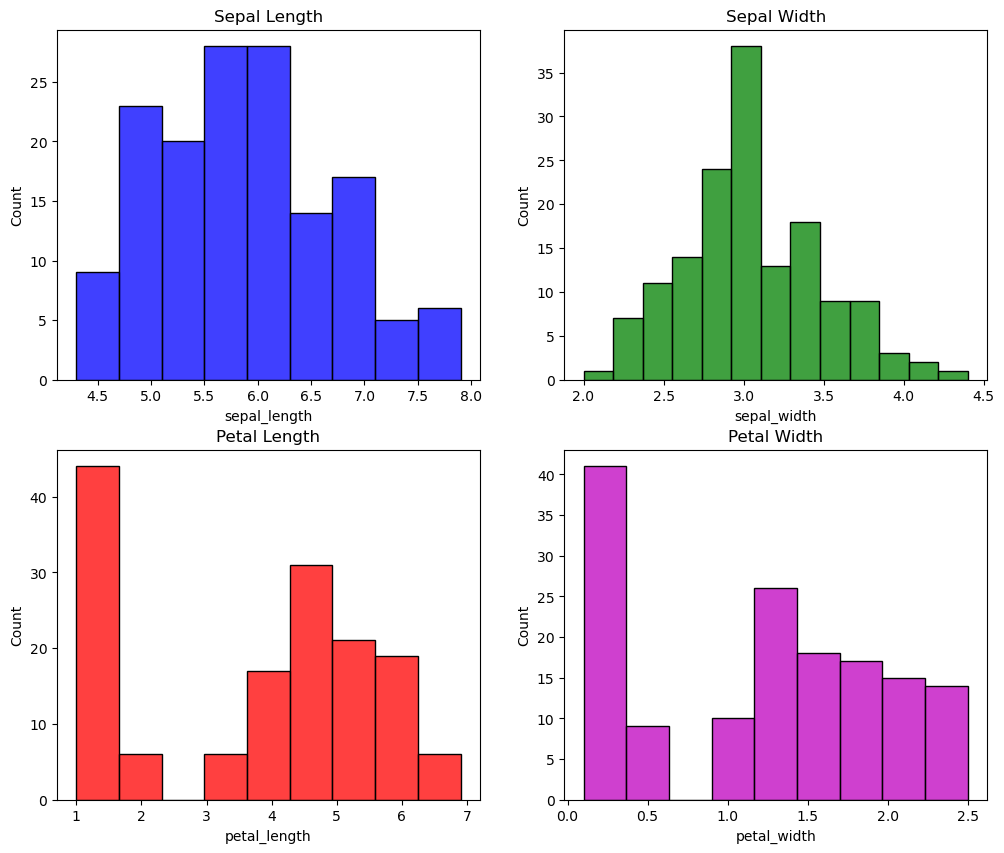

In [19]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for Sepal Length
sns.histplot(data["sepal_length"], ax=axes[0, 0], color="b")
axes[0, 0].set_title("Sepal Length")

# Plot histogram for Sepal Width
sns.histplot(data["sepal_width"], ax=axes[0, 1], color="g")
axes[0, 1].set_title("Sepal Width")

# Plot histogram for Petal Length
sns.histplot(data["petal_length"], ax=axes[1, 0], color="r")
axes[1, 0].set_title("Petal Length")

# Plot histogram for Petal Width
sns.histplot(data["petal_width"], ax=axes[1, 1], color="m")
axes[1, 1].set_title("Petal Width")

plt.show()

Upon reviewing the plots above, it's evident that the distribution "Petal Length (cm)" and "Petal Width (cm)" does not follow a Gaussian distribution. 

Therefore, our next step is to transform the distribution of Numerical Features to adhere to a Gaussian distribution, before starting with the modelling.

### 2.8. Normalization and Scaling the Numerical Data

**Data Normalization**: For models that benefit from normally distributed data (e.g., linear regression, LDA).

**Scaling Data**: Regardless of the distribution, scaling (standardization or normalization) is beneficial for most models, especially those relying on distance metrics (e.g., KNN, SVM) or gradient-based optimization (e.g., neural networks).

**Model Choice**: Choose the model based on the nature of data and the problem at hand. Models like Random Forests and GBMs are robust to various data distributions and often perform well without the need for strict data transformations.


However I will test with 10 different algorithms and I decide to Normalize and then Scale the data. That´s the reason of my choise. My approach is the next:
1. Due to "Petal Length (cm)" and "Petal Width (cm)" does not follow Gaussian Distribution I decide to apply **QuantileTransformation** to them.
2. Then I will apply standard Scaler to to all the features.ta.

In [20]:
# Separate features and class
features = data.drop(columns="class")
class_labels = data["class"]

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0,  n_quantiles=150) #QuantileTransformer uses 1000 quantiles by default
features[["petal_length", "petal_width"]] = quantile_transformer.fit_transform(features[["petal_length", "petal_width"]])

# Apply Standard Scaling to all features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df["class"] = class_labels

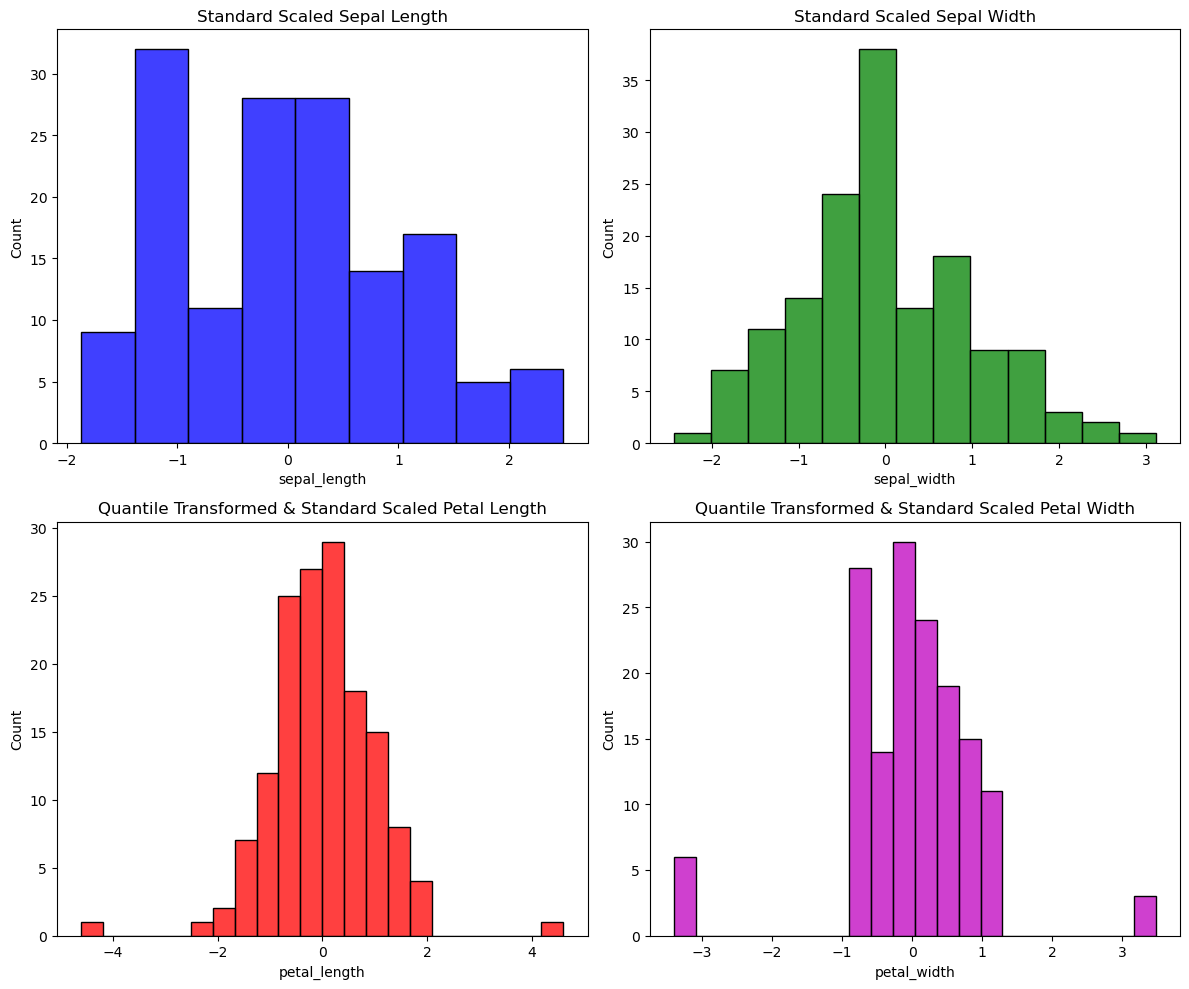

In [21]:
# Display histograms after normalization and scaling
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(scaled_features_df["sepal_length"], ax=axes[0, 0], color="b")
axes[0, 0].set_title("Standard Scaled Sepal Length")

sns.histplot(scaled_features_df["sepal_width"], ax=axes[0, 1], color="g")
axes[0, 1].set_title("Standard Scaled Sepal Width")

sns.histplot(scaled_features_df["petal_length"], ax=axes[1, 0], color="r")
axes[1, 0].set_title("Quantile Transformed & Standard Scaled Petal Length")

sns.histplot(scaled_features_df["petal_width"], ax=axes[1, 1], color="m")
axes[1, 1].set_title("Quantile Transformed & Standard Scaled Petal Width")

plt.tight_layout()
plt.show()

These distributions look much more like a Normal Distribution. It looks like we can start with the automated learning process.

## 3. Train Test Split

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a **test set**:  *X_test, y_test*.

**Train Test Split**: Split the data into a training and test sets. We hide the test set from the algorith to have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![Train Test Split](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

The distribution of the target variable in the original dataset is balanced, that is, every species represent 33,3% of the data. But randomness is randomness and I want to ensure that the train and test sets have a similar distribution, then using stratified sampling would be appropriate.

In [22]:
scaled_features_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.084197,-0.704148,Iris-setosa
1,-1.143017,-0.124958,-1.084197,-0.704148,Iris-setosa
2,-1.385353,0.337848,-1.484606,-0.704148,Iris-setosa
3,-1.506521,0.106445,-0.753273,-0.704148,Iris-setosa
4,-1.021849,1.263460,-1.084197,-0.704148,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.687544,1.046619,Iris-virginica
146,0.553333,-1.281972,0.483162,0.576367,Iris-virginica
147,0.795669,-0.124958,0.687544,0.666659,Iris-virginica
148,0.432165,0.800654,0.771344,1.046619,Iris-virginica


In [23]:
X = scaled_features_df.drop(columns=["class"])    #Features
y = scaled_features_df["class"]    # target variable

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # y_encoded

In [24]:
# Print the original class labels and their corresponding numerical values
print("Class mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

Class mapping:
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica


In [26]:
# Split the data into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=22)

## 4. Model Building

Model building is the process of creating and refining mathematical representations, typically using algorithms or statistical techniques, to make predictions, classifications, or gain insights from data. It involves selecting appropriate features, choosing a suitable algorithm, training the model on labeled data, and evaluating its performance using metrics like accuracy or mean squared error. Model building requires iterative experimentation, parameter tuning, and validation to ensure the resulting model generalizes well to unseen data. It is a fundamental step in machine learning and data analysis, enabling informed decision-making, pattern recognition, and predictive analytics across various domains and industries.

In this notebook I am going to use **10 of the most popular classifiers**:
- Logistic Regression (LR)
- K-Neighbors Classifier (KNN) 
- Support Vector Classifier (SVC)
- Decision Tree Classifier (DTC)
- Random Forest Classifier (RFC)
- Ada Boost Classifier (Adaboost)
- Gradient Boosting Classifier (‎GBM)
- XGB Classifier (XGBoost)
- LightGBM Classifier (LightGBM)
- Cat Boost Classifier (CatBoost)

### 4.1. Base Model Classifiers

**Cross Validation** is a widely used technique for evaluating model performance and subsequent trend checking in machine learning. It consists of partitioning the data into subsets (parts), where one subset is used for training and another subset is used to test and evaluate model performance.
- The partitioned data is the training data (80% of the original data)
- K-fold: the training set is randomly divided into K subsets of approximately the same size, then K iterations are performed, where K-1 subsets are for training and 1 for validation.
- The performance computed by k-fold cross-validation is the average of all the values computed in each iteration.


**Grid Search Cross Validation**

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Grid Search Cross Validation" width="500">

**The confusion matrix**

The confusion matrix is a technique used for summarizing the performance of a classification algorithm (binary outputs).

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*9r99oJ2PTRi4gYF_.jpg" alt="The confusion Matrix" width="500">

In [27]:
random_state = 22

In [28]:
classifiers = [("LR", LogisticRegression(random_state=random_state)),
              ("KNN", KNeighborsClassifier()),
              ("SVC", SVC(random_state=random_state)),
              ("DTC", DecisionTreeClassifier(random_state=random_state)),
              ("RFC", RandomForestClassifier(random_state=random_state)),
              ("Adaboost", AdaBoostClassifier(random_state=random_state)),
              ("GBM", GradientBoostingClassifier(random_state=random_state)),
              ("LightGBM", LGBMClassifier(objective="multiclass", verbose=-1, random_state=random_state)),  # NOT BINARY
              ("GXBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=random_state)), # mlogloss for multiclass problems
              ("CatBoost", CatBoostClassifier(verbose=False, random_state=random_state))]

In [29]:
def base_models(X_train, X_test, y_train, y_test, classifiers, scoring="accuracy"):
    """
    Evaluates a set of classification models using cross-validation and plots confusion matrices.

    Parameters:
    X_train : sparse matrix, shape (n_samples, n_features)
        The training features.
    X_test : sparse matrix, shape (n_samples, n_features)
        The testing features.
    y_train : array-like, shape (n_samples,)
        The training target values.
    y_test : array-like, shape (n_samples,)
        The testing target values.
    classifiers: list of tuples
        List of (name, model) tuples of the classifiers to evaluate.
    scoring : string, default: "roc_auc"
        Scoring metric to evaluate the models.

    Returns:
    None

    This function prints the mean cross-validation score for each classifier and plots the confusion matrix.
    """
    for name, classifier in classifiers:
        # Cross-validate the model
        cv_results = cross_validate(classifier, X_train, y_train, cv=3, scoring=scoring)
        print(cv_results)
        print("**********************")
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name})")

        # Train the model on the entire training set
        classifier.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Print evaluation metrics
        print("Accuracy: ", accuracy)
        print("Precision: ", precision)
        print("Recall: ", recall)
        print("F1-score:", f1)
        
        # Compute the confusion matrix
        cnf_matrix = confusion_matrix(y_test, y_pred)

        # Print confusion matrix results for multi-class classification
        print("Confusion matrix:")
        print(cnf_matrix)
        
        # Plot the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt="g")
        plt.title(f"Confusion matrix for {name}", y=1.1)
        plt.ylabel("Actual label")
        plt.xlabel("Predicted label'")
        plt.show()

{'fit_time': array([0.01795292, 0.02294302, 0.01096964]), 'score_time': array([0.00299048, 0.00199103, 0.00398993]), 'test_score': array([0.975, 0.95 , 0.975])}
**********************
accuracy: 0.9667 (LR)
Accuracy:  0.9666666666666667
Precision:  0.9696969696969696
Recall:  0.9666666666666667
F1-score: 0.9665831244778613
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


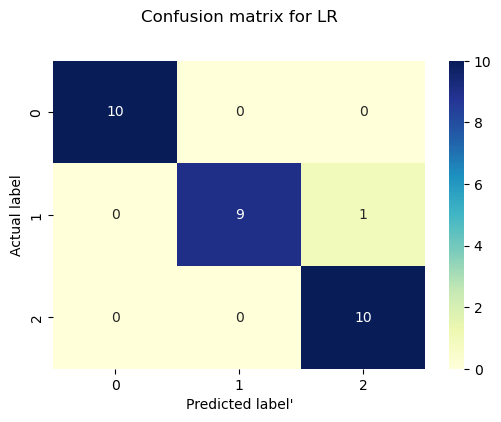

{'fit_time': array([0.00498867, 0.00299168, 0.00199509]), 'score_time': array([0.01096964, 0.0129652 , 0.00797915]), 'test_score': array([0.95 , 0.875, 0.975])}
**********************
accuracy: 0.9333 (KNN)
Accuracy:  0.9666666666666667
Precision:  0.9696969696969696
Recall:  0.9666666666666667
F1-score: 0.9665831244778613
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


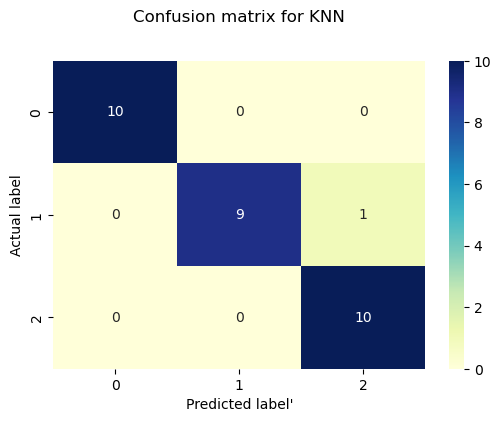

{'fit_time': array([0.00797772, 0.00500107, 0.00299239]), 'score_time': array([0.00498891, 0.00397277, 0.00598335]), 'test_score': array([0.95 , 0.925, 0.925])}
**********************
accuracy: 0.9333 (SVC)
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score: 1.0
Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


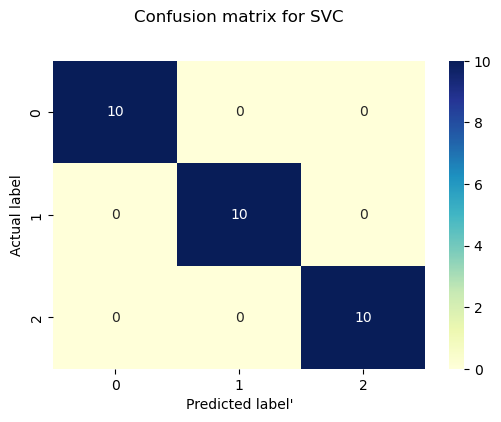

{'fit_time': array([0.00398922, 0.00597906, 0.00498652]), 'score_time': array([0.00398731, 0.00299191, 0.00299191]), 'test_score': array([0.975, 0.925, 0.95 ])}
**********************
accuracy: 0.95 (DTC)
Accuracy:  0.9333333333333333
Precision:  0.9333333333333333
Recall:  0.9333333333333333
F1-score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


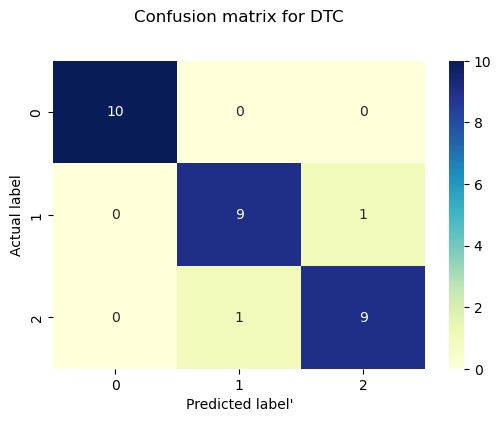

{'fit_time': array([0.29646325, 0.26329756, 0.25331926]), 'score_time': array([0.02692723, 0.01595831, 0.01895094]), 'test_score': array([0.975, 0.925, 0.925])}
**********************
accuracy: 0.9417 (RFC)
Accuracy:  0.9333333333333333
Precision:  0.9333333333333333
Recall:  0.9333333333333333
F1-score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


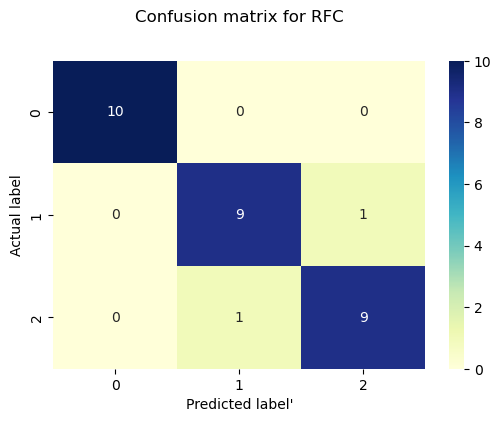

{'fit_time': array([0.13862991, 0.13189125, 0.11720109]), 'score_time': array([0.01396298, 0.01196599, 0.0181911 ]), 'test_score': array([0.975, 0.925, 0.95 ])}
**********************
accuracy: 0.95 (Adaboost)
Accuracy:  0.9333333333333333
Precision:  0.9333333333333333
Recall:  0.9333333333333333
F1-score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


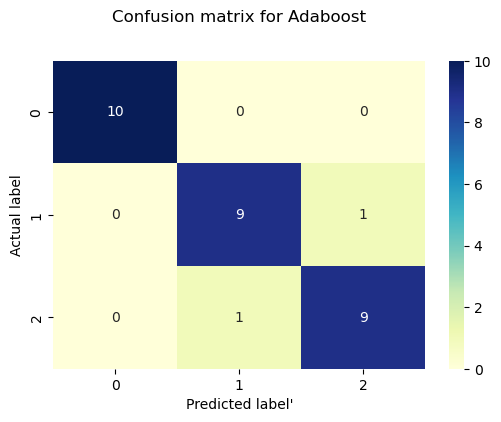

{'fit_time': array([0.39494586, 0.34507704, 0.36819029]), 'score_time': array([0.0039866 , 0.00199485, 0.00199461]), 'test_score': array([0.95 , 0.875, 0.925])}
**********************
accuracy: 0.9167 (GBM)
Accuracy:  0.9333333333333333
Precision:  0.9333333333333333
Recall:  0.9333333333333333
F1-score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


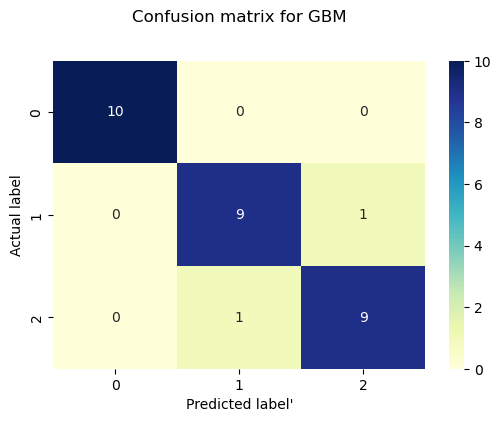

{'fit_time': array([0.25132799, 0.04587626, 0.0498662 ]), 'score_time': array([0.00299311, 0.0039916 , 0.00199556]), 'test_score': array([0.975, 0.925, 0.925])}
**********************
accuracy: 0.9417 (LightGBM)
Accuracy:  0.9333333333333333
Precision:  0.9333333333333333
Recall:  0.9333333333333333
F1-score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


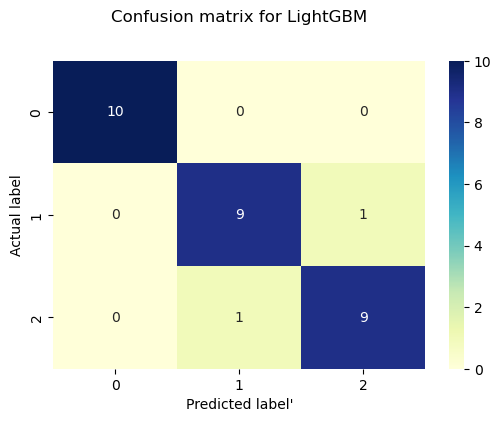

{'fit_time': array([0.11619616, 0.11070371, 0.10197902]), 'score_time': array([0.00498796, 0.00498796, 0.00601196]), 'test_score': array([0.95 , 0.925, 0.925])}
**********************
accuracy: 0.9333 (GXBoost)
Accuracy:  0.9333333333333333
Precision:  0.9333333333333333
Recall:  0.9333333333333333
F1-score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


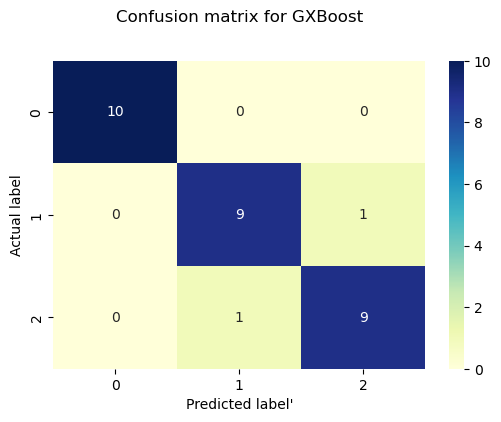

{'fit_time': array([1.96800804, 2.96184516, 4.00166821]), 'score_time': array([0.00398898, 0.00399232, 0.00299263]), 'test_score': array([0.975, 0.925, 0.925])}
**********************
accuracy: 0.9417 (CatBoost)
Accuracy:  0.9333333333333333
Precision:  0.9333333333333333
Recall:  0.9333333333333333
F1-score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


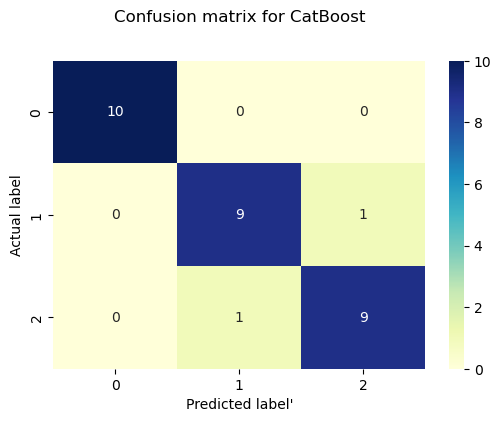

In [30]:
# predict with the base models
base_models(X_train, X_test, y_train, y_test, classifiers, "accuracy")

Given the size of the dataset and the consistency of performance across different cross-validation folds (cv=2, cv=3 and cv=5), Logistic Regression (LR) seems like a reasonable choice.(Accuracy:0.967)

LR is generally computationally efficient, interpretable, and suitable for small datasets. It also tends to perform well when the relationship between features and the target variable is relatively linear, which could be the case with the Iris dataset.

Since LR has already demonstrated strong performance and simplicity, I could start by tuning its hyperparameters using techniques like grid search.

### 4.2. Hyperparameter Optimization

In [31]:
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

In [32]:
# Instantiate Logistic Regression model
lr_base = LogisticRegression(random_state=random_state)

In [33]:
def tuned_model(classifier, param_grid, X_train, y_train, y_test, cv=3, scoring='accuracy'):
    # Perform Grid Search
    grid_search = GridSearchCV(classifier, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X_train, y_train)
    
    # Get best hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    
    # Evaluate model using cross-validation
    scores = cross_validate(best_model, X_train, y_train, cv=cv, scoring=scoring)
    print("***************************************************************************************************************************")
    print("Cross-Validation Scores:", scores)
    print("***************************************************************************************************************************")
    print("Mean Cross-Validation Scores:", round(scores["test_score"].mean(), 4))

    # Predict on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score:", f1)
        
    # Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Print confusion matrix results for multi-class classification
    print("Confusion matrix:")
    print(cnf_matrix)
        
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt="g")
    plt.title(f"Confusion matrix for Tunned Linear Regression", y=1.1)
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label'")
    plt.show()

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
***************************************************************************************************************************
Cross-Validation Scores: {'fit_time': array([0.01196837, 0.01097059, 0.01197076]), 'score_time': array([0.00199485, 0.00199533, 0.00199509]), 'test_score': array([0.975, 0.975, 0.975])}
***************************************************************************************************************************
Mean Cross-Validation Scores: 0.975
Accuracy:  0.9666666666666667
Precision:  0.9696969696969696
Recall:  0.9666666666666667
F1-score: 0.9665831244778613
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


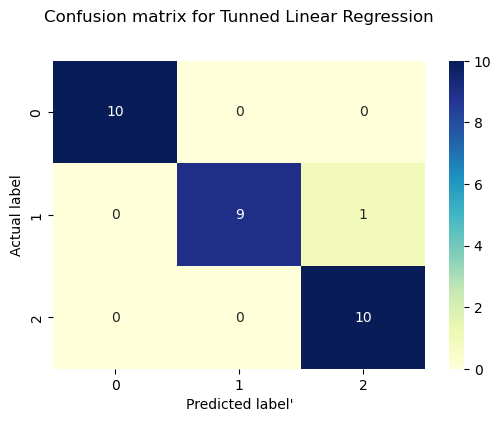

In [34]:
# Use the tuned_model function
tuned_lr_model = tuned_model(lr_base, param_grid, X_train, y_train, y_test)

It seems like the model is performing quite well with an accuracy of approximately 97.75%. 

The confusion matrix indicates that most of the predictions are correct, with only one misclassification in the second row and third column.

The reality is that the optimized model had the same performance as the non-optimized model (confusion matrix). But we must keep in mind that the data set is very small and such a small increase in performance practically goes unnoticed.